# SKOLTECH, Experimental Data Processing

## Evgenii Safronov, Mikhail Kurenkov, Taras Melnik

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from numpy.linalg import inv
import matplotlib as mplb
from matplotlib.font_manager import FontProperties
%matplotlib inline
from numpy.random import normal
mplb.rc('xtick', labelsize=5) 
mplb.rc('ytick', labelsize=5) 

In [3]:
def generate_trajectory(sigma_w_2, sigma_n_2, M, X_0):
    sigma_w = sigma_w_2 ** 0.5
    sigma_n = sigma_n_2 ** 0.5
    w = np.random.normal(0, sigma_w, M)
    n = np.random.normal(0, sigma_n, M)

    x = w.dot(np.tril(np.ones((M, M)))) + X_0 * np.ones(M)
    z = x + n
    return x, z

def calculate_exp_w_n(z):
    v = z - np.roll(z,1)
    p = z - np.roll(z,2)
    E_v = np.average((v ** 2)[1:])
    E_p = np.average((p ** 2)[2:])
    return E_p - E_v, E_v - E_p / 2

def alpha(sigma_w_2, sigma_n_2):
    chi = sigma_w_2 / sigma_n_2
    return (-chi + (chi**2 + 4 * chi) ** 0.5) / 2

def M_opt(alpha):
    return round((2 - alpha) / alpha)

In [4]:
def running_mean(z, M):
    mask = np.ones(M) / M
    return np.convolve(z, mask)

def exp_mean(z, alpha):
    exp_mean_z = z.copy()
    for i in range(1, len(z)):
        exp_mean_z[i] = exp_mean_z[i - 1] + alpha * (z[i] - exp_mean_z[i - 1])
    return exp_mean_z
def backward_exp_mean(x_f, alpha):
    x_b = x_f.copy()
    for i in range(len(x_b)-2,-1,-1):
        x_b[i] = x_b[i+1] + alpha*(x_f[i] - x_b[i+1])
    return x_b

## Part 1 : backward exponential smoothing

In [5]:
N = 300

In [6]:
X, z = generate_trajectory(28**2, 97**2, N, 10)
x_f = exp_mean(z, alpha(28**2,97**2))

In [7]:
x_b = backward_exp_mean(x_f, alpha(28**2,97**2))

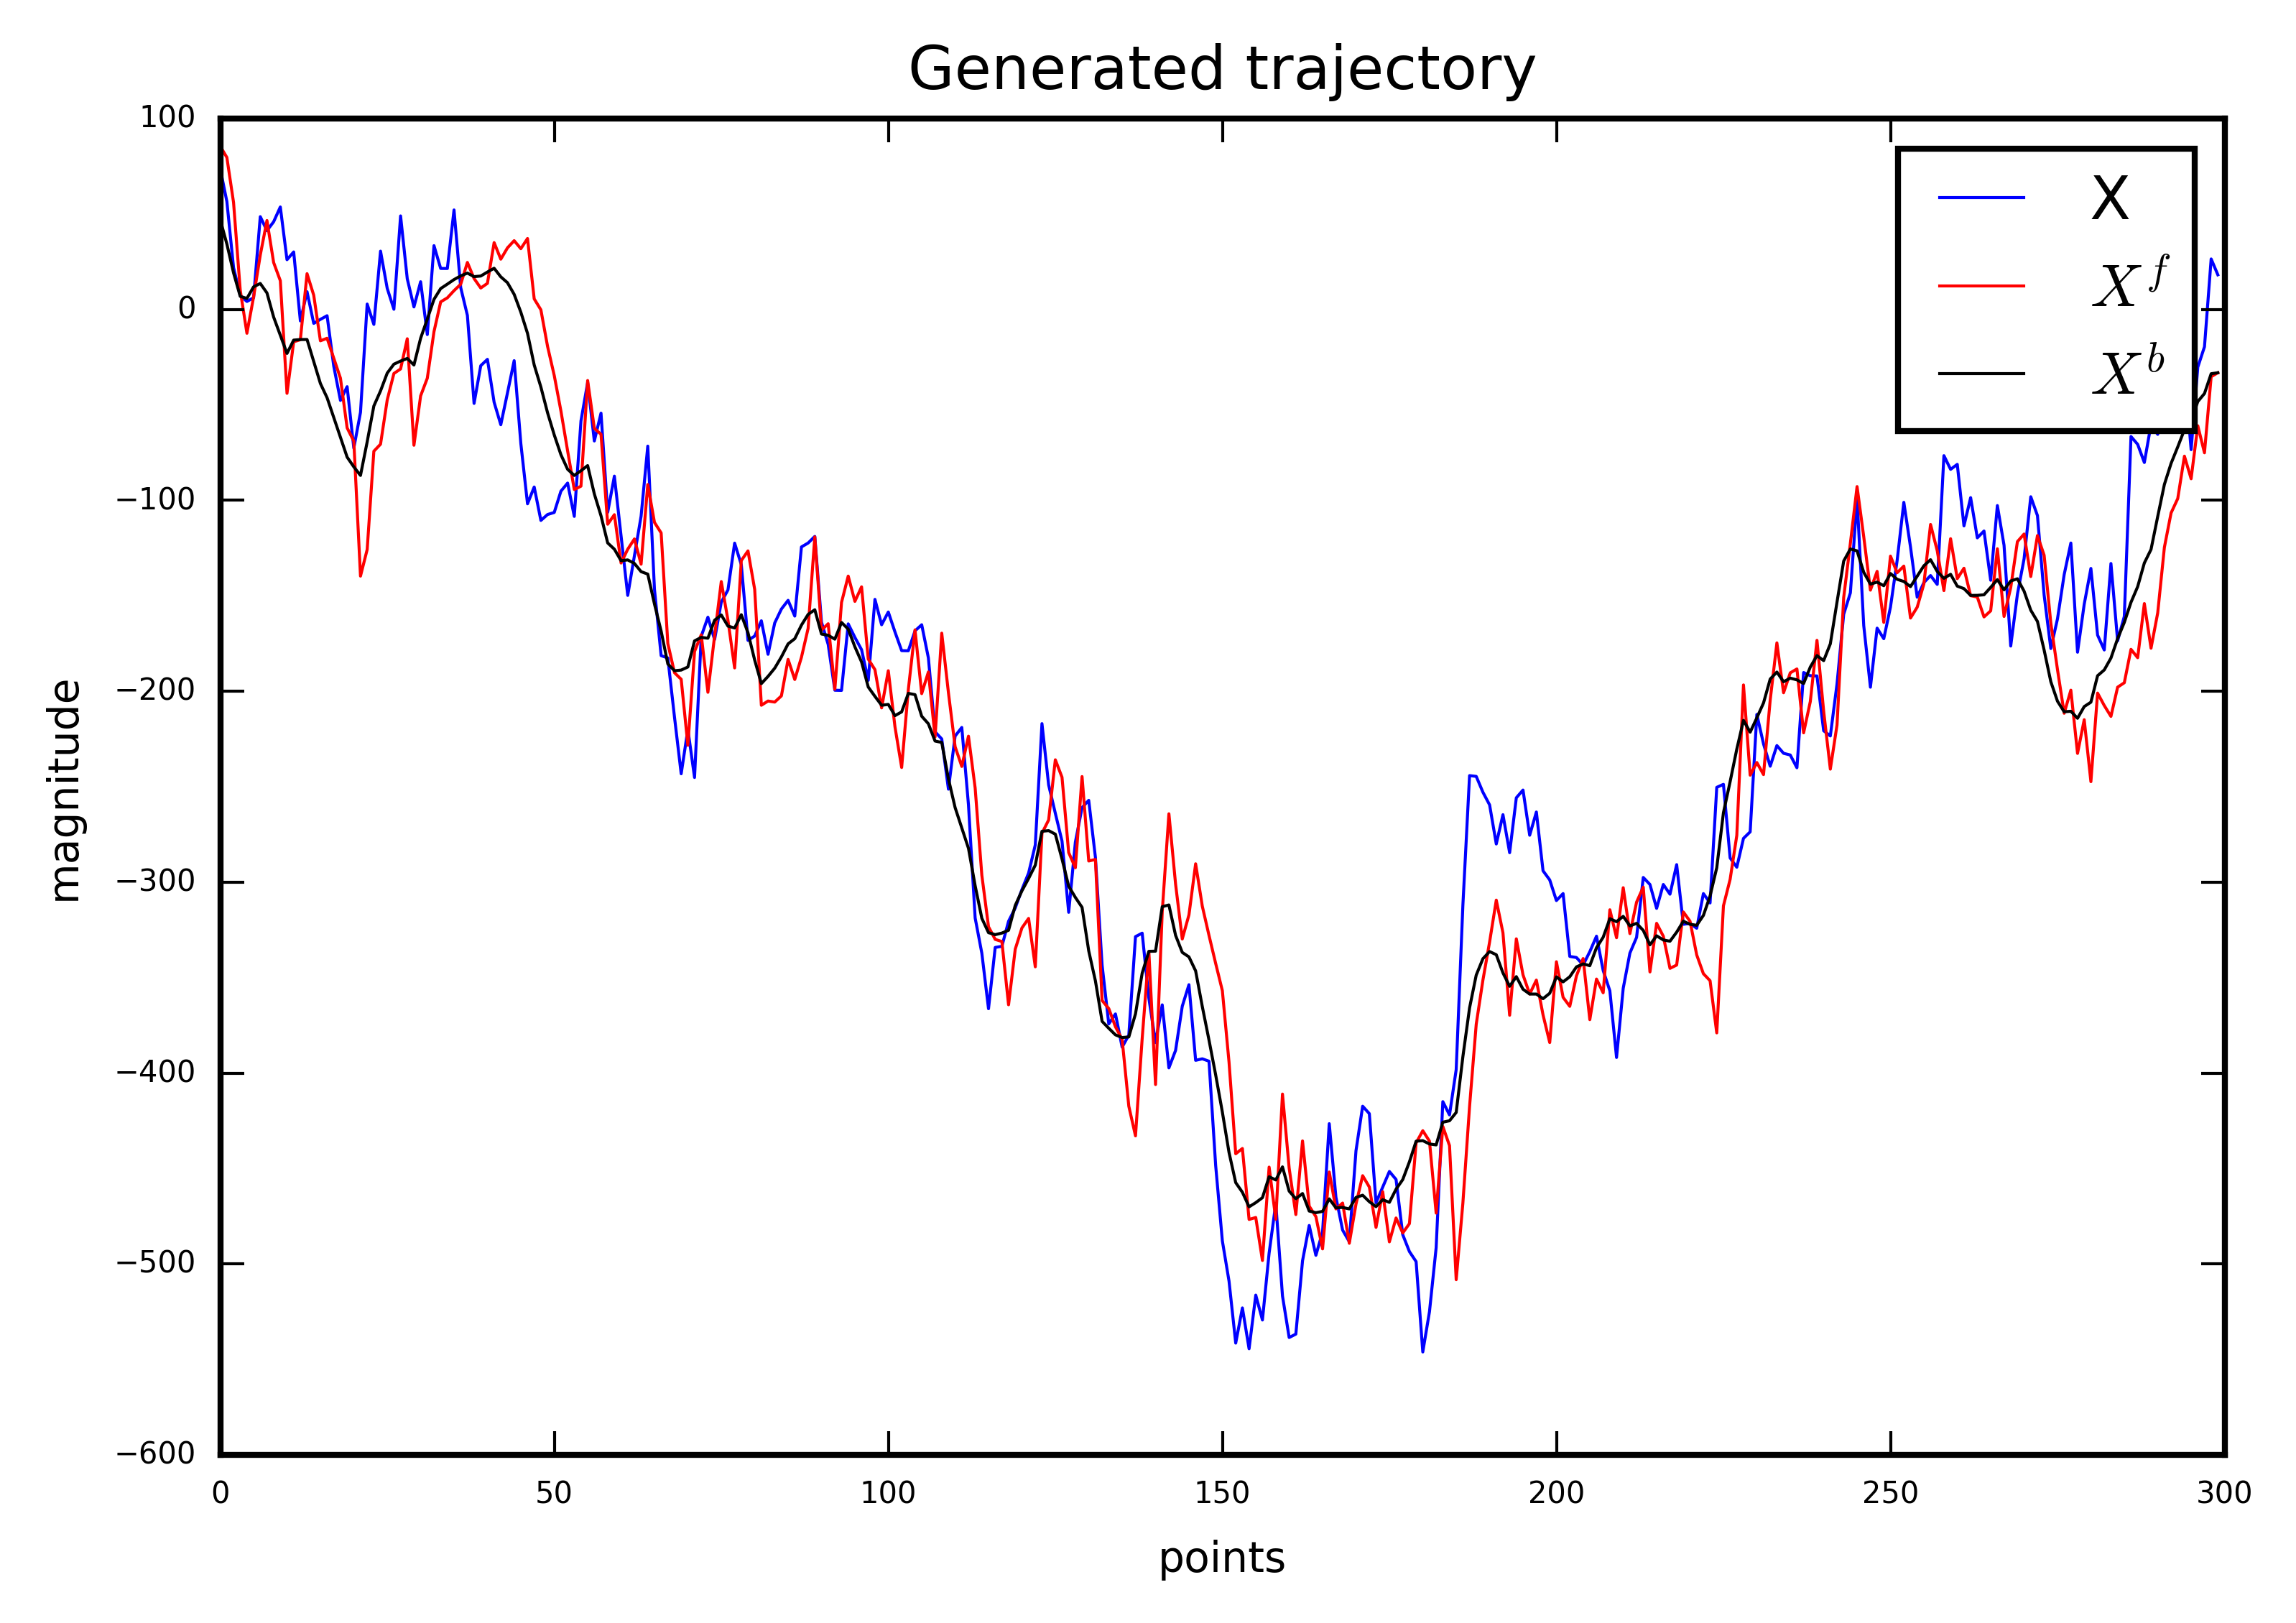

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi = 600)
ax.set_title('Generated trajectory', fontsize = 10)
#ax.plot(range(N),z,'g', label = 'z', linewidth = 0.5 )
ax.plot(range(N),X,'b', label = 'X', linewidth = 0.5 )
ax.plot(range(N),x_f,'r', label = r'$X^f$', linewidth = 0.5 )
ax.plot(range(N),x_b,'black', label = r'$X^b$', linewidth = 0.5 )
ax.set_xlabel('points', fontsize = 7)
ax.set_ylabel('magnitude', fontsize = 7)
ax.legend(loc = 'upper right', fontsize = 10)

In [9]:
np.ones(3).dot(np.triu(np.ones((3,3))))

array([ 1.,  2.,  3.])